In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.utilities as utilities
from visual_behavior.data_access import loading as loading

import visual_behavior.visualization.utils as utils
import visual_behavior.visualization.ophys.platform_paper_figures as ppf

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [4]:
import figrid as fg
import figrid.example_figures as example_figures
import matplotlib.pyplot as plt

### load experiments table

In [5]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# experiments_table = cache.get_ophys_experiments()
# print(cache_dir)

In [6]:
experiments_table = loading.get_platform_paper_experiment_table(limit_to_closest_active=True)
print(len(experiments_table))

402


### get useful info

In [7]:
experience_levels = np.sort(experiments_table.experience_level.unique())
cell_types = np.sort(experiments_table.cell_type.unique())[::-1]
palette = utilities.get_experience_level_colors()

### set params

In [8]:
save_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_2'

folder = 'within_session'

In [9]:
# params for stim response df creation
data_type = 'events'
interpolate = True
output_sampling_rate = 30

epoch_duration_mins = 2

inclusion_criteria = 'platform_experiment_table'

## change epochs

In [10]:
event_type = 'changes'

conditions = ['cell_specimen_id', 'is_change', 'epoch']

suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

change_epoch_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria,
                                                              interpolate, output_sampling_rate, epoch_duration_mins)

change_epoch_mdf = utilities.annotate_epoch_df(change_epoch_mdf)

no multi_session_df for VisualBehaviorMultiscope OPHYS_2_images_A_passive
no multi_session_df for VisualBehaviorMultiscope OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_2_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_5_images_A_passive
no multi_session_df for VisualBehavior OPHYS_2_images_A_passive
no multi_session_df for VisualBehavior OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_1_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_2_images_G_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_3_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_4_images_H
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_5_images_H_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_6_images_H
there are 402 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limitin

Excitatory
Sst Inhibitory
Vip Inhibitory


array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, xlabel='epoch within session', ylabel='mean response'>],
      dtype=object)

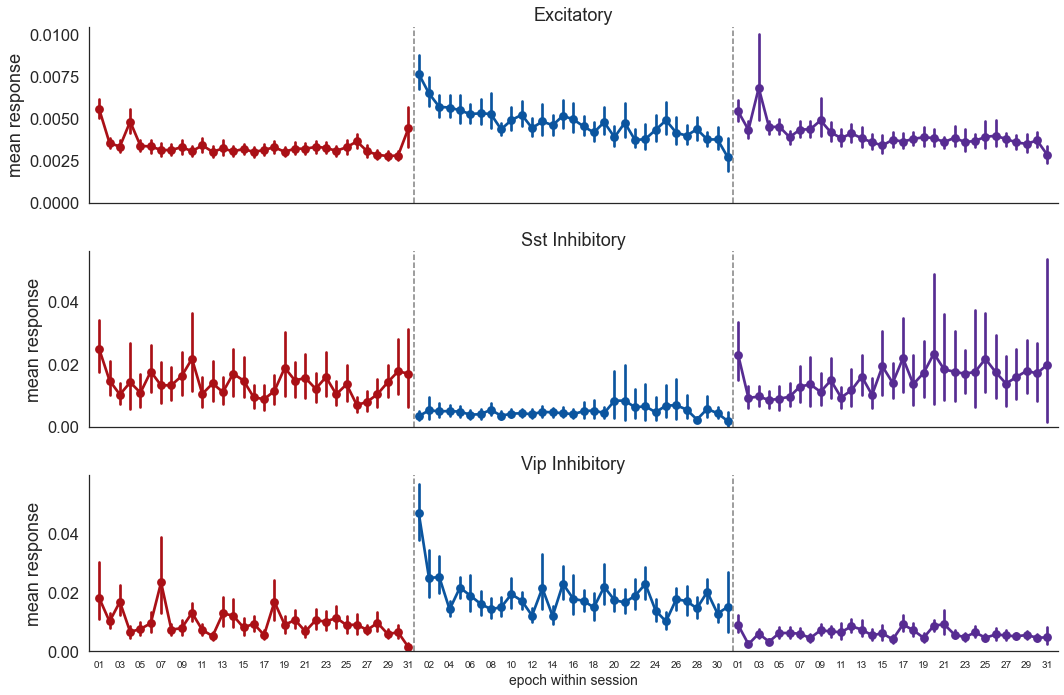

In [11]:
df = change_epoch_mdf.copy()
df = df[df.is_change==True]
# df = df[df.project_code=='VisualBehaviorMultiscope']

ppf.plot_mean_response_by_epoch(df, metric='mean_response', horizontal=False, ymin=0, max_epoch=30, 
                                save_dir=save_dir, folder=folder, suffix=suffix)

In [12]:
# make sure we dont have a mix of long and short epochs
epochs = df.groupby(['ophys_experiment_id', 'epoch']).count()[['cell_specimen_id']].reset_index()
max_epoch = []
for ophys_experiment_id in epochs.ophys_experiment_id.unique():
    max_epoch.append(np.amax(epochs[epochs.ophys_experiment_id==ophys_experiment_id].epoch.values))
print(np.unique(max_epoch)) 

[28 29 30 32]


### changes per container

In [13]:
# df = change_epoch_mdf.copy()
# df = df[df.is_change==True]

# for ophys_container_id in df.ophys_container_id.unique():
#     container_df = df[df.ophys_container_id==ophys_container_id]
#     container_meta = utils.get_container_metadata_string(utils.get_metadata_for_row_of_multi_session_df(container_df))
#     container_meta = container_meta+'_changes_'+data_type
#     rig = container_df.equipment_name.unique()[0]
#     if 'MESO' in rig: 
#         ymin = -0.02
#     else: 
#         ymin = -0.002

#     ppf.plot_mean_response_by_epoch(container_df, metric='mean_response', horizontal=False, ymin=ymin, max_epoch=30, 
#                                         save_dir=save_dir, folder=folder+'\containers', 
#                                      suffix=container_meta, suptitle=container_meta)

### pre-change epochs

In [14]:
event_type = 'all'

conditions = ['cell_specimen_id', 'pre_change', 'epoch']

pre_change_epoch_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria,
                                                           interpolate, output_sampling_rate, epoch_duration_mins)

pre_change_epoch_mdf = utilities.annotate_epoch_df(pre_change_epoch_mdf)

no multi_session_df for VisualBehaviorMultiscope OPHYS_2_images_A_passive
no multi_session_df for VisualBehaviorMultiscope OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_2_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_5_images_A_passive
no multi_session_df for VisualBehavior OPHYS_2_images_A_passive
no multi_session_df for VisualBehavior OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_1_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_2_images_G_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_3_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_4_images_H
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_5_images_H_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_6_images_H
there are 402 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limitin

Excitatory
Sst Inhibitory
Vip Inhibitory


array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, xlabel='epoch within session', ylabel='mean response'>],
      dtype=object)

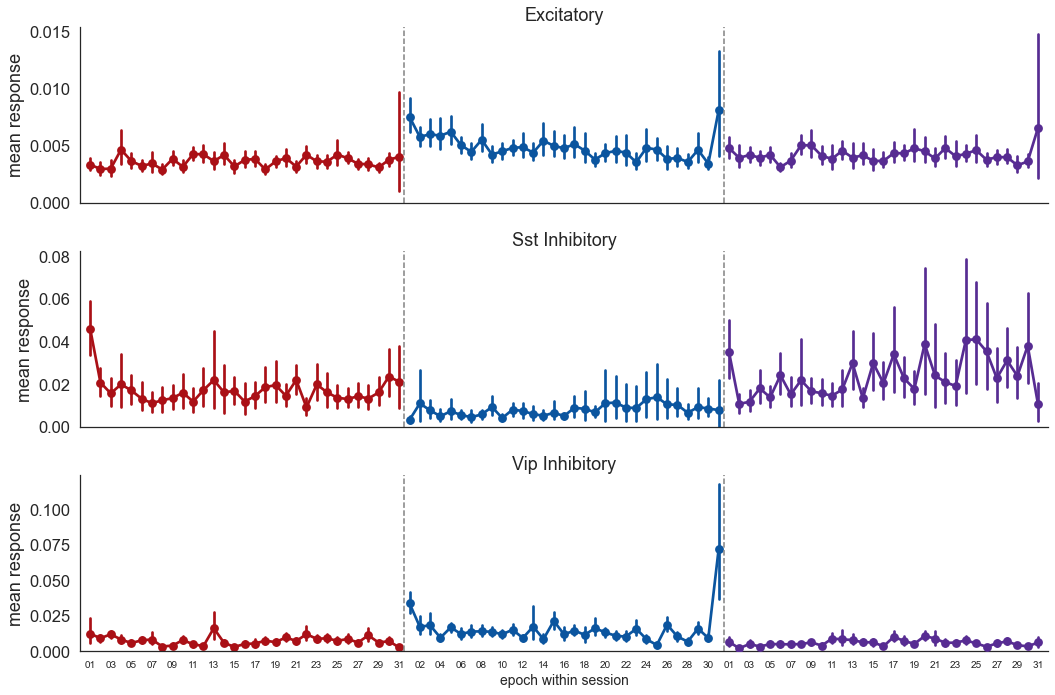

In [25]:
df = pre_change_epoch_mdf.copy()
df = df[df.pre_change==True]
df = df[df.project_code=='VisualBehaviorMultiscope']

ppf.plot_mean_response_by_epoch(df, metric='mean_response', horizontal=False, ymin=0, max_epoch=30,
                                save_dir=save_dir, folder=folder, suffix=suffix)

In [16]:
# make sure we dont have a mix of long and short epochs
epochs = df.groupby(['ophys_experiment_id', 'epoch']).count()[['cell_specimen_id']].reset_index()
max_epoch = []
for ophys_experiment_id in epochs.ophys_experiment_id.unique():
    max_epoch.append(np.amax(epochs[epochs.ophys_experiment_id==ophys_experiment_id].epoch.values))
print(np.unique(max_epoch)) 

[28 29 30 32]


### pre change per container

In [17]:
# df = pre_change_epoch_mdf.copy()
# df = df[df.pre_change==True]

# for ophys_container_id in df.ophys_container_id.unique():
#     container_df = df[df.ophys_container_id==ophys_container_id]
#     container_meta = utils.get_container_metadata_string(utils.get_metadata_for_row_of_multi_session_df(container_df))
#     container_meta = container_meta+'_pre_change_'+data_type
#     rig = container_df.equipment_name.unique()[0]
#     if 'MESO' in rig: 
#         ymin = -0.02
#     else: 
#         ymin = -0.002

#     ppf.plot_mean_response_by_epoch(container_df, metric='mean_response', horizontal=False, ymin=ymin, max_epoch=30, 
#                                         save_dir=save_dir, folder=folder+'\containers', 
#                                      suffix=container_meta, suptitle=container_meta)

### omission epochs

In [18]:
event_type = 'omissions'

conditions = ['cell_specimen_id', 'omitted', 'epoch']

omission_epoch_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria,
                                                           interpolate, output_sampling_rate, epoch_duration_mins)

omission_epoch_mdf = utilities.annotate_epoch_df(omission_epoch_mdf)

no multi_session_df for VisualBehaviorMultiscope OPHYS_2_images_A_passive
no multi_session_df for VisualBehaviorMultiscope OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_2_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_5_images_A_passive
no multi_session_df for VisualBehavior OPHYS_2_images_A_passive
no multi_session_df for VisualBehavior OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_1_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_2_images_G_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_3_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_4_images_H
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_5_images_H_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_6_images_H
there are 402 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limitin

Excitatory
Sst Inhibitory
Vip Inhibitory


array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='mean response'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, xlabel='epoch within session', ylabel='mean response'>],
      dtype=object)

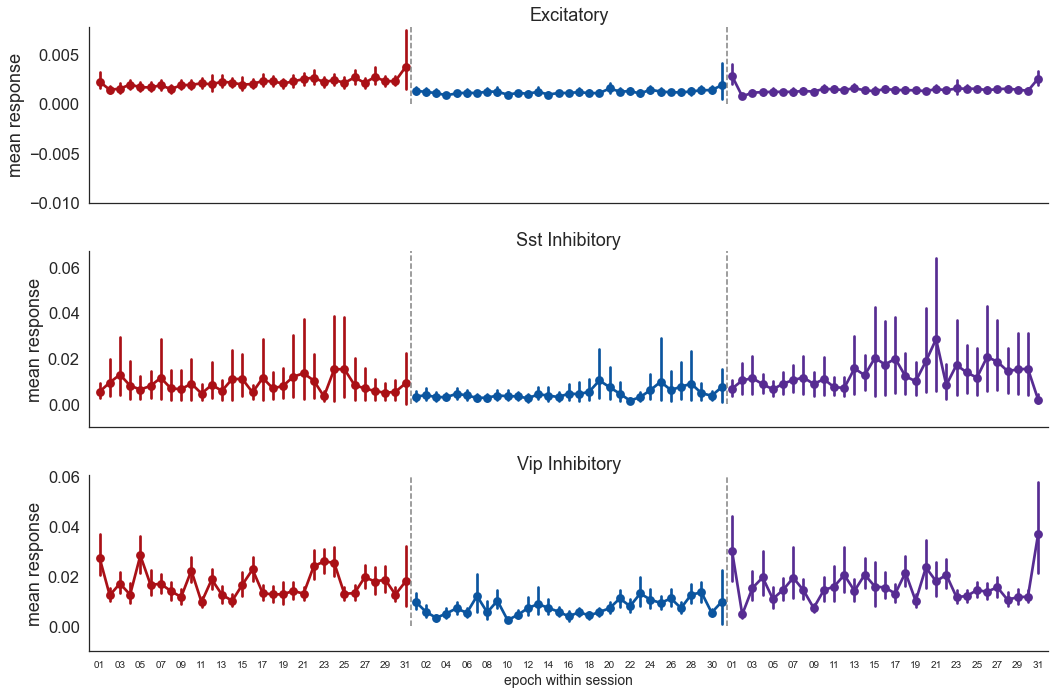

In [19]:
df = omission_epoch_mdf.copy()
df = df[df.omitted==True]
# df = df[df.project_code=='VisualBehaviorMultiscope']

ppf.plot_mean_response_by_epoch(df, metric='mean_response', horizontal=False, ymin=-0.01, max_epoch=30, 
                                save_dir=save_dir, folder=folder, suffix=suffix)

In [20]:
# make sure we dont have a mix of long and short epochs
epochs = df.groupby(['ophys_experiment_id', 'epoch']).count()[['cell_specimen_id']].reset_index()
max_epoch = []
for ophys_experiment_id in epochs.ophys_experiment_id.unique():
    max_epoch.append(np.amax(epochs[epochs.ophys_experiment_id==ophys_experiment_id].epoch.values))
print(np.unique(max_epoch)) 

[28 29 30 31 32]


### omissions per container

In [21]:
# df = omission_epoch_mdf.copy()
# df = df[df.omitted==True]

# for ophys_container_id in df.ophys_container_id.unique():
#     container_df = df[df.ophys_container_id==ophys_container_id]
#     container_meta = utils.get_container_metadata_string(utils.get_metadata_for_row_of_multi_session_df(container_df))
#     container_meta = container_meta+'_omissions_'+data_type
#     rig = container_df.equipment_name.unique()[0]
#     if 'MESO' in rig: 
#         ymin = -0.02
#     else: 
#         ymin = -0.002

#     ppf.plot_mean_response_by_epoch(container_df, metric='mean_response', horizontal=False, ymin=ymin, max_epoch=30, 
#                                         save_dir=save_dir, folder=folder+'\containers', 
#                                      suffix=container_meta, suptitle=container_meta)

### changes, omissions and images together

In [26]:
event_type = 'all'

conditions = ['cell_specimen_id', 'is_change', 'omitted', 'epoch']

images_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria,
                                                           interpolate, output_sampling_rate, epoch_duration_mins)

images_mdf = utilities.annotate_epoch_df(images_mdf)

no multi_session_df for VisualBehaviorMultiscope OPHYS_2_images_A_passive
no multi_session_df for VisualBehaviorMultiscope OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_2_images_B_passive
no multi_session_df for VisualBehaviorTask1B OPHYS_5_images_A_passive
no multi_session_df for VisualBehavior OPHYS_2_images_A_passive
no multi_session_df for VisualBehavior OPHYS_5_images_B_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_1_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_2_images_G_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_3_images_G
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_4_images_H
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_5_images_H_passive
no multi_session_df for VisualBehaviorMultiscope4areasx2d OPHYS_6_images_H
there are 402 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limitin

In [28]:
images_mdf.is_change.unique()

array([False,  True])

In [29]:
images_mdf.omitted.unique()

array([False,  True])

In [51]:
def plot_mean_response_by_epoch_for_multiple_conditions(response_df_dict, metric='mean_response', horizontal=True,
                                                        ymin=0, suptitle=None,
                                                        save_dir=None, folder='epochs', suffix=''):
    """
    Plots the mean metric value across 10 minute epochs, for two different conditions (multi_session_dfs)
    The two conditions are defined by the multi_session_dfs passed in the response_df_dict, 
    which should have two keys, one for the name of each multi_session_df, and the values are the multi_session_dfs
    :param response_df_dict: dictionary containing two dataframes of cell activity with one row per cell_specimen_id / ophys_experiment_id
                            must include columns 'cell_type', 'experience_level', 'epoch', and a column for the metric provided (ex: 'mean_response')
    :param metric: metric value to average over epochs, must be a column of df
    :param save_dir: top level directory to save figure to
    :param folder: folder within save_dir to save figure to; will create folder if it doesnt exist
    :param suffix: string to append at end of saved filename
    :param use_alpha: If True, will plot the two conditions as light and dark versions of experience level colors
                      If False, will plot the two conditions as black and gray lines
    :return:
    """
    import matplotlib.lines as mlines
    
    df_names = list(response_df_dict.keys())
    
    colors = sns.color_palette('Paired', len(df_names))

    # get xtick values from one of the dfs
    df = response_df_dict[df_names[0]]
    xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]
    n_epochs = np.amax(df.epoch.unique())
    # get info to plot
    cell_types = np.sort(df.cell_type.unique())[::-1]
    experience_epoch = np.sort(df.experience_epoch.unique())
    palette = utils.get_experience_level_colors()
    
    if horizontal:
        figsize = (13, 3.5)
        fig, ax = plt.subplots(1, 3, figsize=figsize, sharex=False)
    else:
        figsize = (15, 10)
        fig, ax = plt.subplots(3, 1, figsize=figsize, sharex=True)
    for i, cell_type in enumerate(cell_types):

        for c, df_name in enumerate(df_names): 

            df = response_df_dict[df_name]
            data = df[df.cell_type==cell_type]
            ax[i] = sns.pointplot(data=data, x='experience_epoch', y=metric, label=df_name,
                               order=experience_epoch, color=colors[c], ax=ax[i])
        ax[i].set_ylim(ymin=ymin)
        ax[i].set_title(cell_type)
        ax[i].vlines(x=n_epochs-0.5, ymin=0, ymax=1, color='gray', linestyle='--')
        ax[i].vlines(x=(n_epochs*2)+1.5, ymin=0, ymax=1, color='gray', linestyle='--')
        
#     labels = [df_name.split('_')[0] for df_name in df_names]
#     ax[i].legend(labels=labels, fontsize=14, loc='upper right')
    
    image = mlines.Line2D([], [], color=colors[0], label='non-change')
    change = mlines.Line2D([], [], color=colors[1], label='change')
    omission = mlines.Line2D([], [], color=colors[2], label='omission')
    ax[i].legend(handles=[image, change, omission], fontsize='x-small')
    
    xlabel = str(int(60/n_epochs))+ ' min epoch in session'
    ax[i].set_xlabel(xlabel)
    ax[i].set_xticklabels(xticks, fontsize=9)
        
    if suptitle is None: 
        plt.suptitle(metric+' over time - '+df_names[0] +', '+ df_names[1] +' - '+ suffix, x=0.52, y=1.02, fontsize=16)
    else: 
        plt.suptitle(suffix, x=0.52, y=1.02, fontsize=16)
    fig.tight_layout()
    if save_dir:
        fig_title = metric + '_epochs_' + df_names[0] +'_'+ df_names[1] + suffix
        utils.save_figure(fig, figsize, save_dir, folder, fig_title)

In [32]:
# create dict containing two multi_session_dfs to include in the same plot
# second df gets plotted in light color, first in dark

max_epoch = 30

response_df_dict = {}
response_df_dict['image_mdf'] = images_mdf[(images_mdf.omitted==False)&(images_mdf.is_change==False)&(images_mdf.epoch<=max_epoch)]
response_df_dict['change_mdf'] = images_mdf[(images_mdf.omitted==False)&(images_mdf.is_change==True)&(images_mdf.epoch<=max_epoch)]
response_df_dict['omission_mdf'] = images_mdf[(images_mdf.omitted==True)&(images_mdf.is_change==False)&(images_mdf.epoch<=max_epoch)]

df_names = list(response_df_dict.keys())

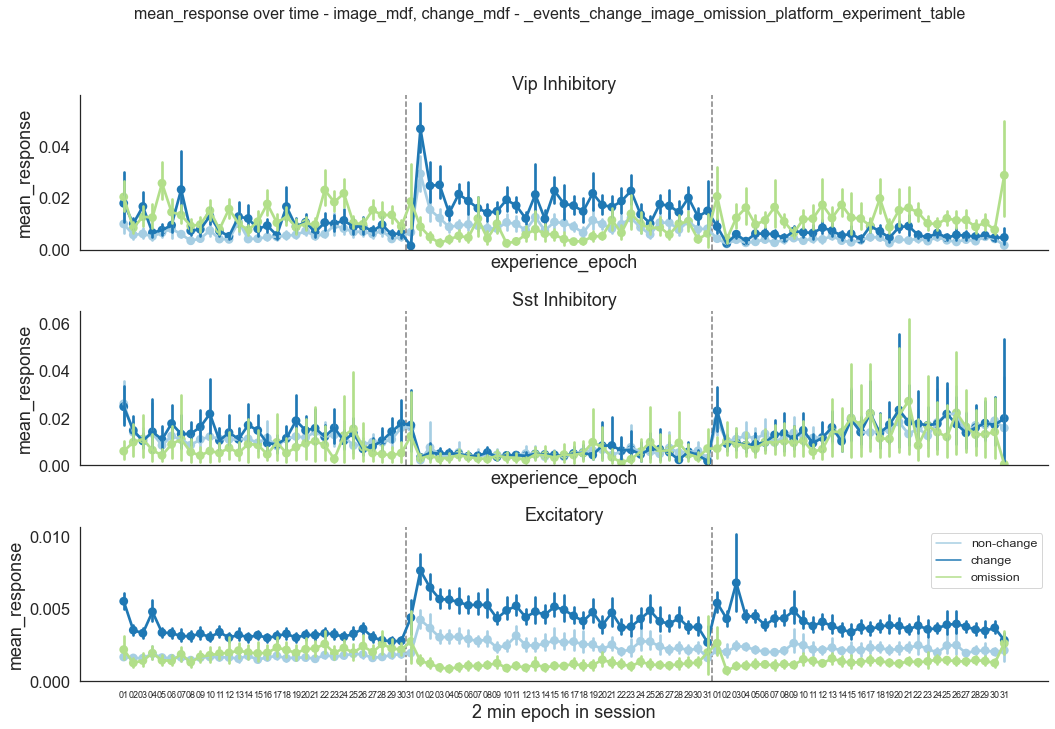

In [52]:
plot_mean_response_by_epoch_for_multiple_conditions(response_df_dict, metric='mean_response', horizontal=False,
                                                    save_dir=save_dir, folder=folder, suffix='_events_change_image_omission_'+inclusion_criteria)

'within_session'

In [41]:
suffix

'_events_is_change_epoch_platform_experiment_table'

### for each mouse

In [ ]:
for mouse_id in images_mdf.mouse_id.unique():
    
    response_df_dict = {}
    response_df_dict['image_mdf'] = images_mdf[(images_mdf.omitted==False)&(images_mdf.is_change==False)&
                                               (images_mdf.epoch<=max_epoch)&(images_mdf.mouse_id==mouse_id)]
    response_df_dict['change_mdf'] = images_mdf[(images_mdf.omitted==False)&(images_mdf.is_change==True)&
                                                (images_mdf.epoch<=max_epoch)&(images_mdf.mouse_id==mouse_id)]
    response_df_dict['omission_mdf'] = images_mdf[(images_mdf.omitted==True)&(images_mdf.is_change==False)&
                                                  (images_mdf.epoch<=max_epoch)&(images_mdf.mouse_id==mouse_id)]

    
    container_meta = utils.get_container_metadata_string(utils.get_metadata_for_row_of_multi_session_df(response_df_dict['image_mdf']))
    container_meta = container_meta+'_+data_type
#     rig = container_df.equipment_name.unique()[0]
#     if 'MESO' in rig: 
#         ymin = -0.02
#     else: 
#         ymin = -0.002

    plot_mean_response_by_epoch_for_multiple_conditions(response_df_dict, metric='mean_response', horizontal=True,
                                                    save_dir=save_dir, folder='within_session\per_mouse', suffix=container_meta)